---
bibliography: ../../SI-references.bib
---

## Introduction

## Theory 

In this section, I will give a brief overview of three clustering methods: KMeans, DBSCAN, and Hierarchical Clustering. 

### KMEANS
The K-Means clustering method is an unsupervised machine lerning algorithm. The goal of K-Means to group points that are similar together into cluseters in an attempt to reveal any underlying patterns. K-Means works only with numerical data, and each data point must be able to be described using numerical coordinates [@burkardt2009k].

In order to return clusters of your selected input data, K-Means will create k numbers of clusters, based on a value of k that you select. One way that we can choose an optimal values of k is by using the elbow method, which plots the sum of the squared distances between each cluster as the value of k increases. When we look at the plot, there is a point where "increasing the size of the cluster provides minimal gain to the error function [@Artley_2022]." This can be seen in the image below.

![@Artley_2022](../../images/elbow_method.png)

After we choose our value for k, K-Means will assign each data point to a cluster using the euclidian distance to each centroid. After all the data points are assinged, the centroids of each cluster will be updated by taking the mean of the data points and assigning it to be the new center of the cluster. This reassigning points to clusters and recalcuating the centroids will occur until the centroids values don't change anymore [@Artley_2022]. 

### DBSCAN

DBSCAN, or density-based spatial clustering of applications with noise, is an unsupervised clustering algorithm based on clusters and noise. Any density based clustering method is useful when we have a dataset that has irregular or intertwined clusters or when there is a lot of noise or outliers. 

DBSCAN will first divide the dataset into n number of dimensions. Then it will group points together that are tightly packed by forming an n dimensional shape around each point in the dataset. Clusters will be formed by the points that fall within that shape [@Lutins_2017]. 

### Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering method. It has a nested structure that is somewhat organized like a tree, and does not assume a value of k. Hierarchical clustering can be further subdivided into two types: agglomerative (bottom up) and divisive (top down) hierarchical clustering. We can visualize this technique using a dendrogram.

![](../../images/hierarchical-clustering.png)

In agglomerative hierarchical clustering, "each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy [how to cite the slide]." The basic algorithm of agglomerative hierarchical clustering includes computing the proximity matrix, letting each data point be its own cluster, and then repreating to merge the two closest clusters and update the proximity matrix, until only one cluster remains [@Patlolla_2018]. 

![](../../images/agglomerative-clustering.png)


Divisive hierarchical clustering is the opposite of agglomerative hierarchical clustering. In divisive hierarchical clustering, "all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy [cite the slides]." 

## Methods 

If you are using Quarto (recommended), then include your code in-line using the “code folding” option, so that users can toggle the code on/off as needed. The notebook should also be hosted on Github. You can always do the entire thing in .ipynb then render it to HTML using Quarto at the end.

### Data Selection 
- Data selection: If you have not done so already, create either a numeric record feature dataset �    AND/OR a text feature dataset �    from your existing data.
- Remove the labels (targets) �   as needed so that it is suitable for clustering.
- If you have labels, you can use them at the end, to check if the clustering predictions coincided with the existing labels in the data-set. In general this may or may-not be true.
- But these labels should not be used as part of the clustering analysis.

I've chosen to use the same data set that I used for my Naive Bayes tab but I hope to use a different target. I will not be performing feature selection as I already performed it previously and this is the optimal subset. 



In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib as plt

file_path = "../../../../data/01-modified-data/injury_prevention_data_soccer.csv"
soccer_injury = pd.read_csv(file_path)

soccer_injury.columns = soccer_injury.columns.str.strip()

soccer_injury = soccer_injury.replace({"yes": 1, "no": 0})
soccer_injury.head()

,ID,Age,Height,Mass,Team,Position,Years of Football Experience,Previous Injuries,Number of Injuries,Ankle Injuries,...,Importance Injury Prevention,Knowledgeability,Prevention Measure Stretching,Prevention Measure Warm Up,Prevention Measure Specific Strength Exercises,Prevention Measure Bracing,Prevention Measure Taping,Prevention Measure Shoe Insoles,Prevention Measure Face Masks,Prevention Measure Medical Corset
0,146,19,173.0,67.6,1,3,1,1,6,1,...,2,1,1,0,1,0,0,0,0,0
1,155,22,179.5,71.0,1,3,1,1,2,0,...,1,1,1,1,0,0,0,0,0,0
2,160,22,175.5,71.8,1,3,1,1,7,1,...,1,1,1,0,0,0,0,1,0,0
3,164,23,190.0,80.5,1,4,1,1,1,0,...,1,1,1,1,1,0,0,0,0,0
4,145,19,173.5,68.7,1,3,1,1,2,1,...,1,2,1,1,0,0,1,0,0,0


In [2]:
x_vars = ['Prevention Measure Stretching', 'Prevention Measure Warm Up',
       'Prevention Measure Specific Strength Exercises',
       'Prevention Measure Bracing', 'Prevention Measure Taping',
       'Prevention Measure Shoe Insoles', 'Prevention Measure Face Masks',
       'Prevention Measure Medical Corset']

si_subset = soccer_injury[x_vars]
si_subset.head()

,Prevention Measure Stretching,Prevention Measure Warm Up,Prevention Measure Specific Strength Exercises,Prevention Measure Bracing,Prevention Measure Taping,Prevention Measure Shoe Insoles,Prevention Measure Face Masks,Prevention Measure Medical Corset
0,1,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0
3,1,1,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler

X = si_subset.copy()
X_norm = StandardScaler().fit_transform(X)

### Hyper-Parameter Tuning 

- For each of the three clustering algorithms, perform any relevant parameter tuning in an attempt to achieve the optimal clustering results
- e.g. For k-means, Use Elbow and Silhouette methods to illustrate the ideal number of clusters. Visualize your results.
- Also, when relevant, explore different choices of distance metric for the algorithm. Which distance metric seems to works best in which cases and why?

### K-Means: Elbow Method

Text(0, 0.5, 'Inertia')

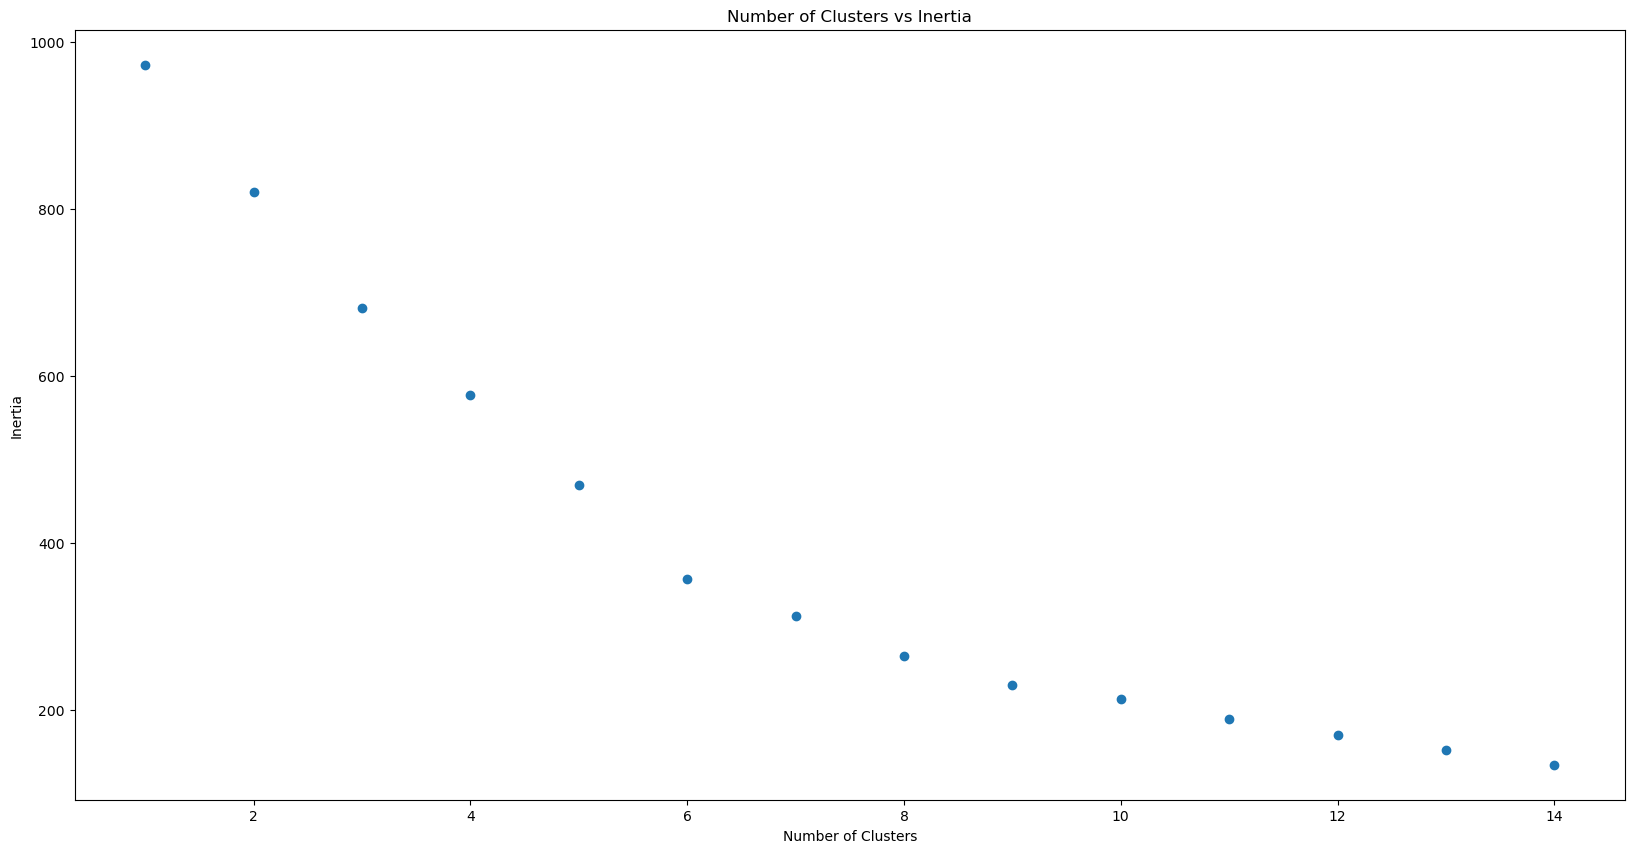

In [23]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
import numpy as np 
import matplotlib.pyplot as plt

num_clusters = range(1, 15)
kmeans_values = []
inertia_values = []
distortion_values = []

num_clusters = range(1, 15)

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_norm) 
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    distortion = 0
    for i in range(len(X_norm)):
        cluster_idx = labels[i]
        distortion += np.linalg.norm(X_norm[i] - centroids[cluster_idx])**2
    distortion /= len(X_norm) 
    distortion_values.append(distortion)

    inertia = kmeans.inertia_
    
    kmeans_values.append(k)
    inertia_values.append(inertia) 

df = pd.DataFrame({"Number of Clusters": kmeans_values, "Inertia": inertia_values, "Distortion": distortion_values})
df.head()

plt.figure(figsize=(20, 10))
plt.scatter(data=df, x="Number of Clusters", y="Inertia")
plt.title("Number of Clusters vs Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

Text(0.5, 0, 'Number of Clusters')

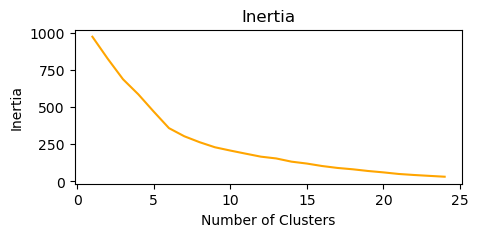

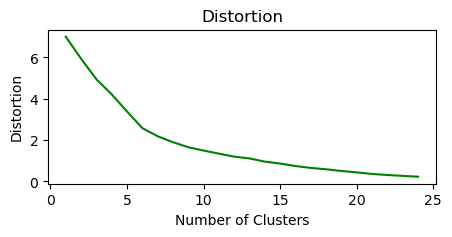

In [22]:
import seaborn as sns
plt.figure(figsize=(5, 2))
sns.lineplot(df, x="Number of Clusters", y="Inertia", color="orange")
plt.title("Inertia")
plt.xlabel("Number of Clusters")

plt.figure(figsize=(5, 2))
sns.lineplot(df, x="Number of Clusters", y="Distortion", color="green")
plt.title("Distortion")
plt.xlabel("Number of Clusters")

From the graph above, we can learn that the optimal number of clusters is 6.

### K-Means Silhouette Score

In [10]:
import sklearn.cluster

def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    i_print=False

    X=np.ascontiguousarray(X) 

    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

In [11]:
def plot(X,color_vector):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, cmap="viridis")
    ax.set(xlabel='Feature-1 (x_1)', ylabel='Feature-2 (x_2)',
    title='Cluster data')
    ax.grid()
    plt.show()

/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/reneedemaio/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

OPTIMAL PARAMETER = 32


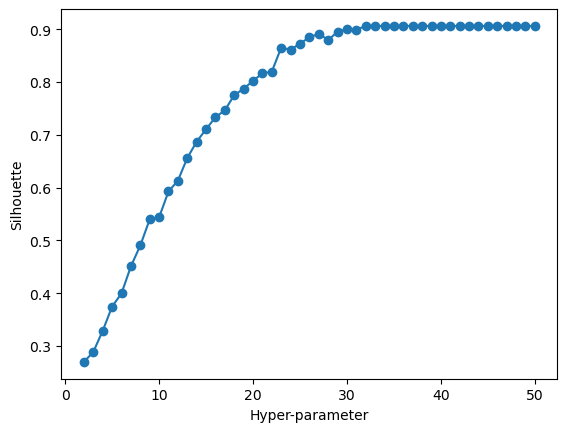

InvalidIndexError: (slice(None, None, None), 0)

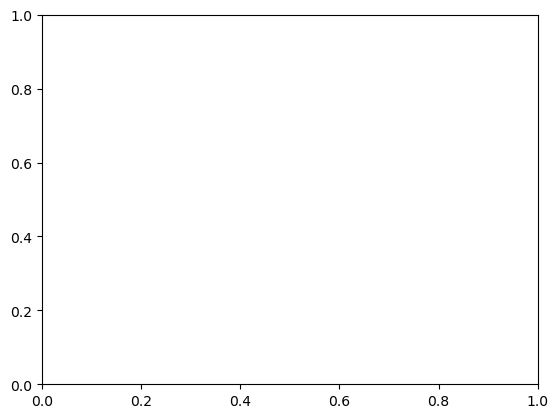

In [15]:
import sklearn.cluster
opt_labels=maximize_silhouette(X,algo="kmeans",nmax=50, i_plot=True)
plot(X,opt_labels)

### DBSCAN

OPTIMAL PARAMETER = 0.5


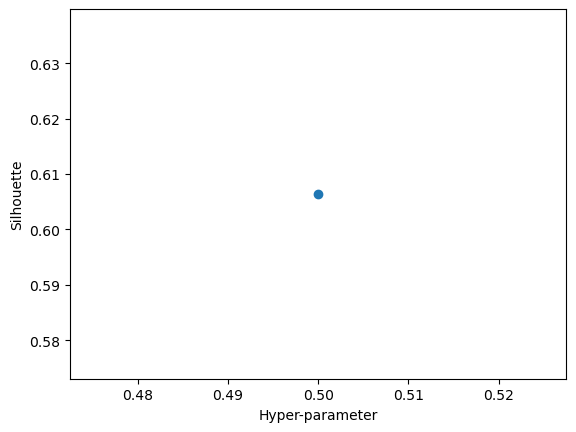

InvalidIndexError: (slice(None, None, None), 0)

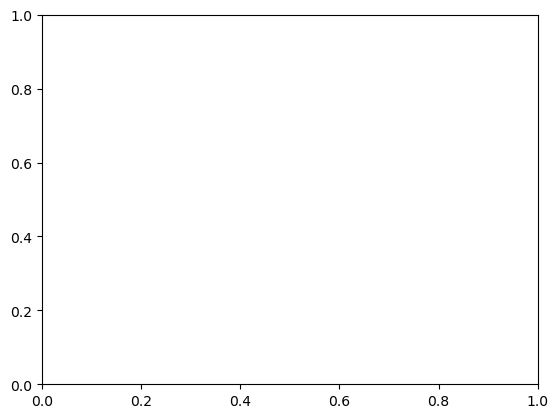

In [18]:
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, i_plot=True)
plot(X,opt_labels)

### Agglomerative Clustering 

OPTIMAL PARAMETER = 31


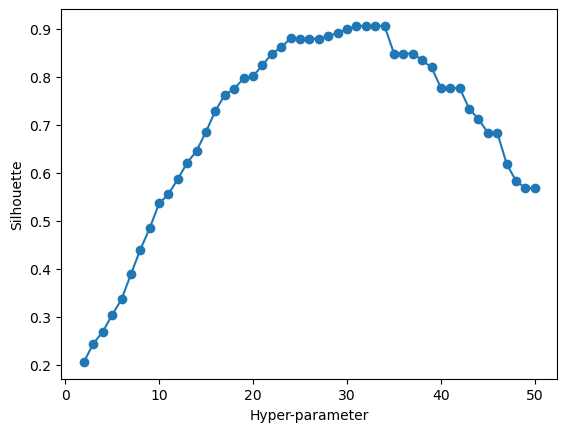

InvalidIndexError: (slice(None, None, None), 0)

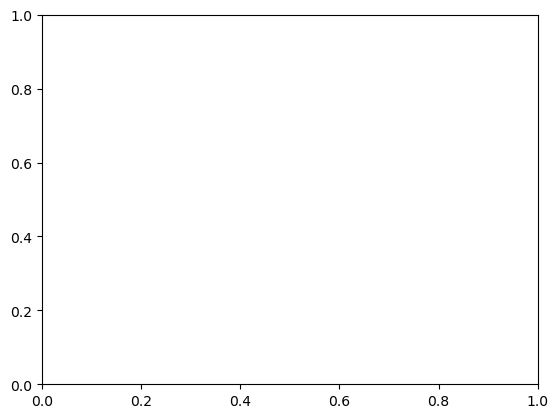

In [16]:
opt_labels=maximize_silhouette(X,algo="ag",nmax=50, i_plot=True)
plot(X,opt_labels)

### Final Results 
- Once you have everything “dialed in”, re-do the analysis one last time with the optimal parameter choice to get your “final results”.

#### Agglomerative Clustering 

Text(0.5, 1.0, 'Agglomerative Clustering')

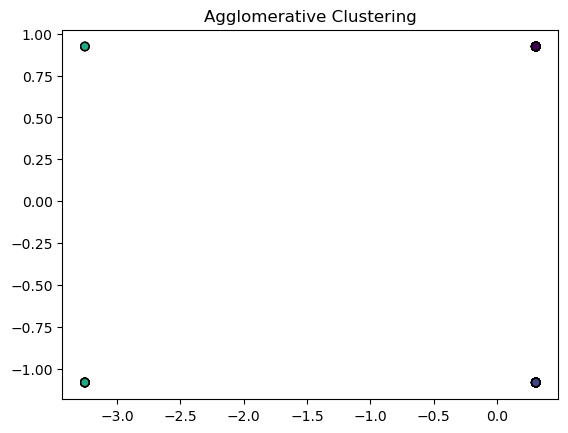

In [24]:
agg_cluster = AgglomerativeClustering(n_clusters=6)
agg_labels = agg_cluster.fit_predict(X_norm)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=agg_labels, cmap="viridis", edgecolors="k")
plt.title("Agglomerative Clustering")

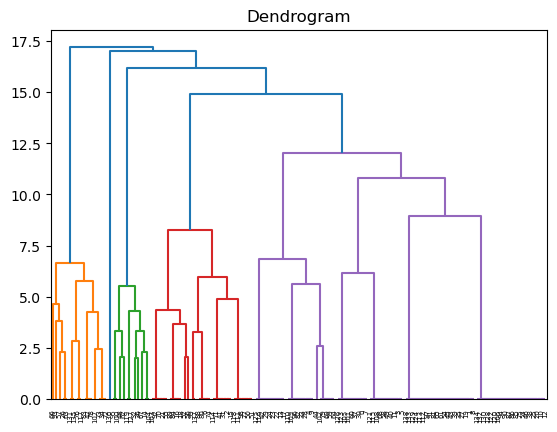

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_norm, method="ward")
dendrogram(linkage_matrix)
plt.title('Dendrogram')

plt.show()

## Results 
- Using your “final results”, discuss, illustrate, and compare the results of your various clustering analysis methods.
- Which method seemed to work the best and why, which was easier to use or preferable, etc.
- Can you make connections between the optimal cluster predictions, after parameter tuning, with any of the labels in the data set. Do they coincide? Why or why not?
- Did the clustering results provide any new insights into your data
- Explore the results, and create as many meaningful visualizations as you need. Be creative, and experiment with different image aesthetics.
- Ensure all visualizations are professional, ascetically pleasing, labeled, captioned, use color, are clear, and support your discussion and goals.



## Conclusions

- In this section, the goal is to summarize & wrap-up the report. It explains what was found, in a way that would make sense to a general readership.
- This area is non-technical. Technical descriptions of what you did should be in the methods or results sections, not conclusions.
- The Conclusions should focus on key and important findings and how these findings affect real-life and real people.

## References 

- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
